# Think Bayes

This notebook presents example code and exercise solutions for Think Bayes.

Copyright 2018 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import classes from thinkbayes2
from thinkbayes2 import Hist, Pmf, Suite
import thinkplot

### The Grizzly Bear Problem

In 1996 and 1997 Mowat and Strobeck deployed bear traps in locations in British Columbia and Alberta, in an effort to estimate the population of grizzly bears.  They describe the experiment in "Estimating Population Size of Grizzly Bears Using Hair Capture, DNA Profiling, and Mark-Recapture Analysis"

The "trap" consists of  a lure and several strands of barbed wire intended to capture samples of hair from bears that visit the lure.  Using the hair samples, the researchers use DNA analysis to identify individual bears.

During the first session, on June 29, 1996, the researchers deployed traps at 76 sites.  Returning 10 days later, they obtained 1043 hair samples and identified 23 different bears.  During a second 10-day session they obtained 1191 samples from 19 different bears, where 4 of the 19 were from bears they had identified in the first batch.

To estimate the population of bears from this data, we need a model for the probability that each bear will be observed during each session.  As a starting place, we'll make the simplest assumption, that every bear in the population has the same (unknown) probability of being sampled during each round.

We also need a prior distribution for the population.  As a starting place, let's suppose that, prior to this study, an expert in this domain would have estimated that the population is between 100 and 500, and equally likely to be any value in that range.


Solution:

Define:

* N: population size

* K: number of bears that have ever been identified

* n: number of bears observed in the second second

* k: the number of bears in the second session that had previously been identified


For given values of N, K, and n, the distribution of k is the hypergeometric distribution:

$PMF(k) = {K \choose k}{N-K \choose n-k}/{N \choose n}$

In [2]:
# Solution

from scipy.special import binom

class Grizzly(Suite):
    """Represents hypotheses about how many bears there are."""

    def Likelihood(self, data, hypo):
        """Computes the likelihood of the data under the hypothesis.

        hypo: total population (N)
        data: # tagged (K), # caught (n), # of caught who were tagged (k)
        """
        N = hypo
        K, n, k = data

        if hypo < K + (n - k):
            return 0

        like = binom(N-K, n-k) / binom(N, n)
        return like

In [3]:
# Solution

hypos = range(100, 501)
suite = Grizzly(hypos)

data = 23, 19, 4
suite.Update(data)

8.05801258299152e-06

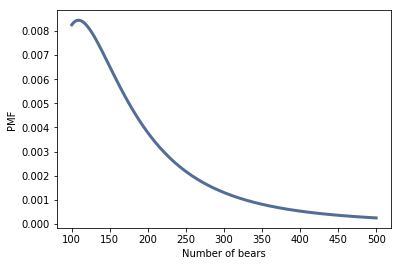

In [4]:
# Solution

thinkplot.Pdf(suite)
thinkplot.Config(xlabel='Number of bears', ylabel='PMF', legend=False)

In [5]:
# Solution

print('Posterior mean', suite.Mean())
print('Maximum a posteriori estimate', suite.MaximumLikelihood())
print('90% credible interval', suite.CredibleInterval(90))

Posterior mean 193.93845891363907
Maximum a posteriori estimate 109
90% credible interval (105, 379)


In [6]:
# Solution

# Alternatively, we can take advantage of the `hypergeom`
# object in scipy.stats.

from scipy import stats

class Grizzly2(Suite):
    """Represents hypotheses about how many bears there are."""

    def Likelihood(self, data, hypo):
        """Computes the likelihood of the data under the hypothesis.

        hypo: total population (N)
        data: # tagged (K), # caught (n), # of caught who were tagged (k)
        """
        N = hypo
        K, n, k = data

        if hypo < K + (n - k):
            return 0

        like = stats.hypergeom.pmf(k, N, K, n)
        return like

In [7]:
# Solution

hypos = range(100, 501)
suite = Grizzly2(hypos)

data = 23, 19, 4
suite.Update(data)

0.07135370142238903

In [8]:
# Solution

print('Posterior mean', suite.Mean())
print('Maximum a posteriori estimate', suite.MaximumLikelihood())
print('90% credible interval', suite.CredibleInterval(90))

Posterior mean 193.9384589136376
Maximum a posteriori estimate 109
90% credible interval (105, 379)
